In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Covid19_dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.utils import to_categorical


In [3]:
train_dir = '/content/Covid19-dataset/train'
test_dir = '/content/Covid19-dataset/test'
categories = ['Covid', 'Normal','Viral Pneumonia']

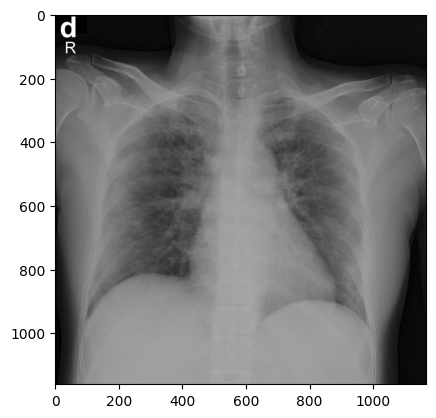

In [4]:
for category in categories:
  path = os.path.join(train_dir, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')

    break
  break

In [5]:
img_array

array([[53,  2, 12, ..., 14, 14, 15],
       [53,  2, 12, ..., 14, 14, 17],
       [54,  2, 12, ..., 12, 13, 16],
       ...,
       [44,  1,  1, ..., 11, 11, 11],
       [44,  0,  1, ..., 11, 11, 11],
       [44,  0,  2, ..., 11, 11, 11]], dtype=uint8)

In [6]:
img_array.shape

(1161, 1166)

In [7]:
img_width, img_height = 720,720
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [10]:
model=Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(720, 720, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256,activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')]
)


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='categorical_crossentropy',metrics=['accuracy']
    )

In [14]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=10,
                    )

Epoch 1/10
8/8 [==============================] - 161s 19s/step - loss: 1.7135 - accuracy: 0.3466 - val_loss: 1.0784 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 149s 18s/step - loss: 1.0312 - accuracy: 0.5259 - val_loss: 2.0712 - val_accuracy: 0.3030
Epoch 3/10
8/8 [==============================] - 150s 18s/step - loss: 0.9377 - accuracy: 0.6574 - val_loss: 0.6944 - val_accuracy: 0.6818
Epoch 4/10
8/8 [==============================] - 154s 18s/step - loss: 0.6976 - accuracy: 0.7012 - val_loss: 0.8538 - val_accuracy: 0.6061
Epoch 5/10
8/8 [==============================] - 149s 17s/step - loss: 0.6359 - accuracy: 0.7211 - val_loss: 0.6958 - val_accuracy: 0.7576
Epoch 6/10
8/8 [==============================] - 150s 18s/step - loss: 0.4578 - accuracy: 0.8207 - val_loss: 0.5304 - val_accuracy: 0.7273
Epoch 7/10
8/8 [==============================] - 151s 18s/step - loss: 0.6574 - accuracy: 0.7649 - val_loss: 1.2862 - val_accuracy: 0.6818
Epoch 8/10
8/8 [====

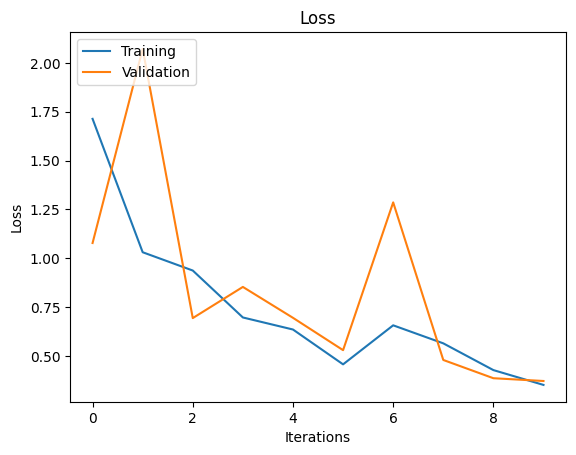

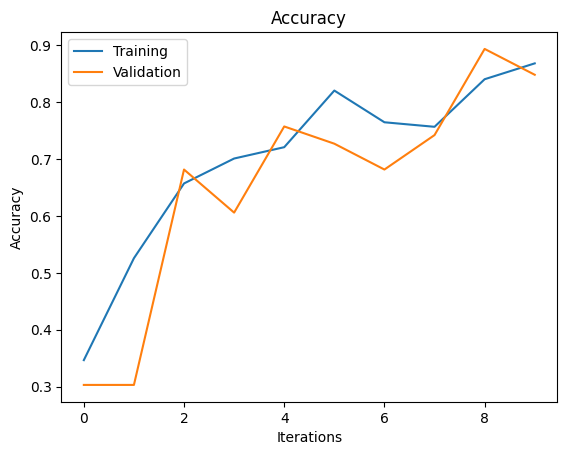

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()